<a href="https://colab.research.google.com/github/gauravpks/ml-repo/blob/master/Part%204%20-%20Clustering/K-Means%20Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

##Intutition

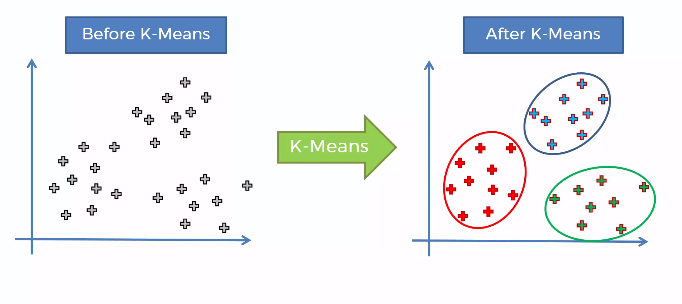

STEP BY STEP Approach

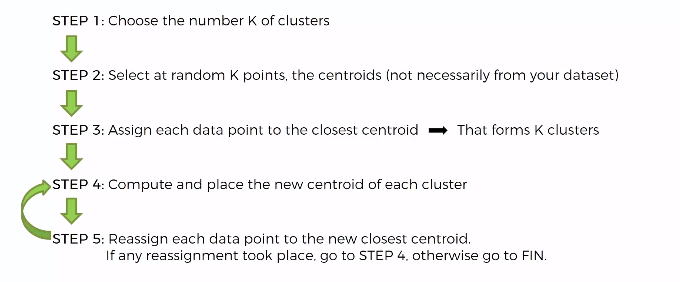

Can we classify the cluster? even with 2 variables

Assuming 2 clusters..

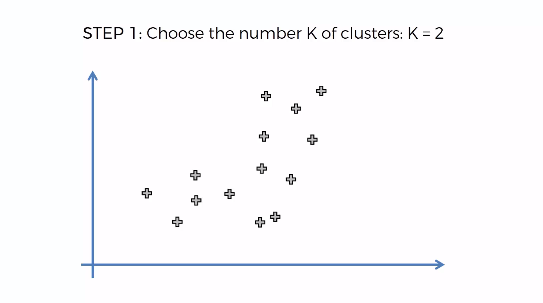

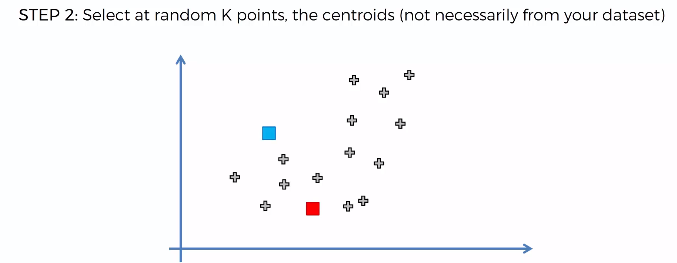

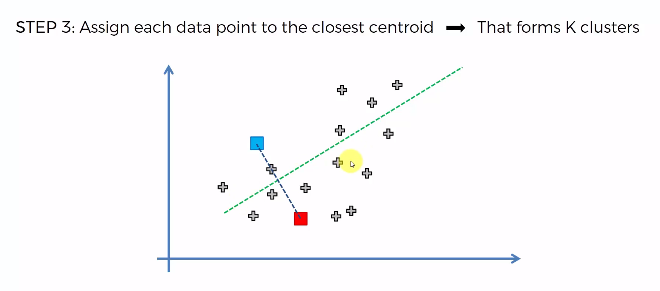

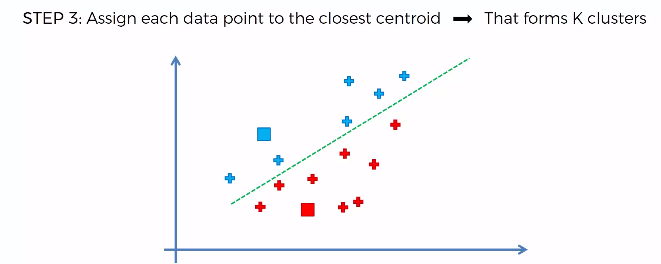

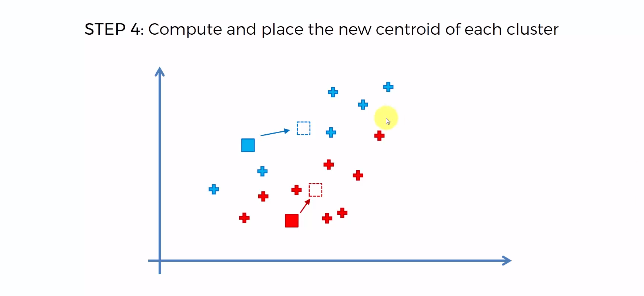

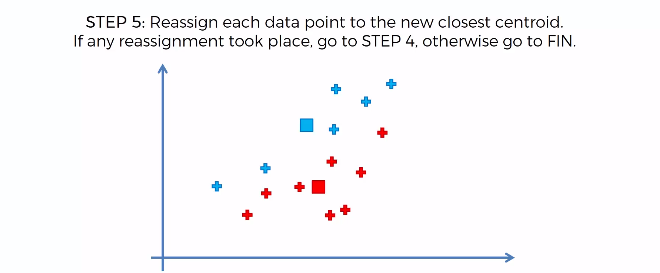

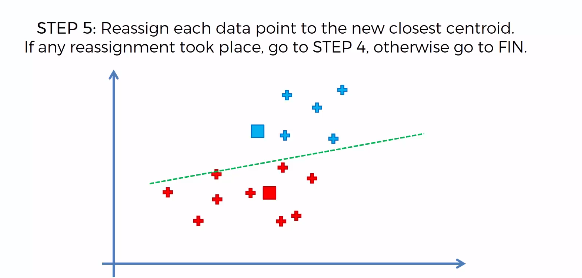

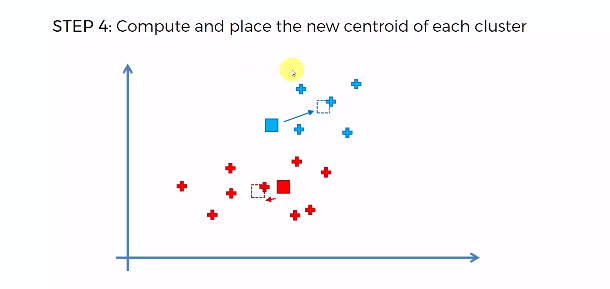

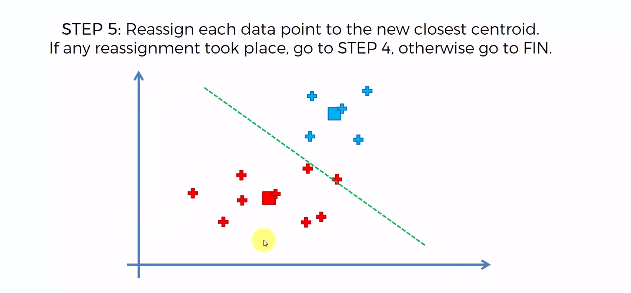

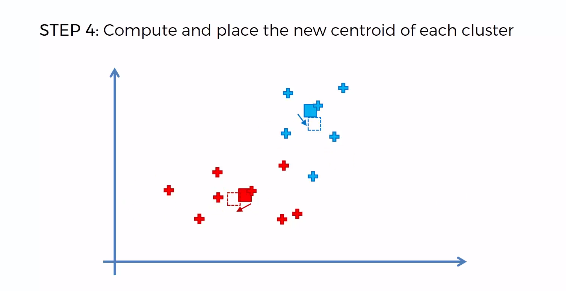

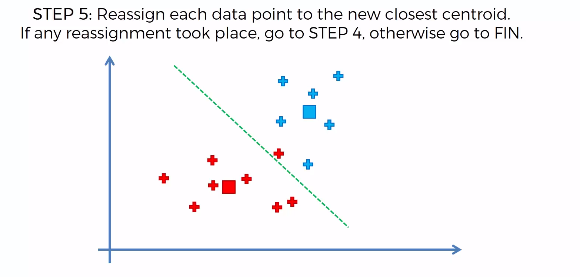

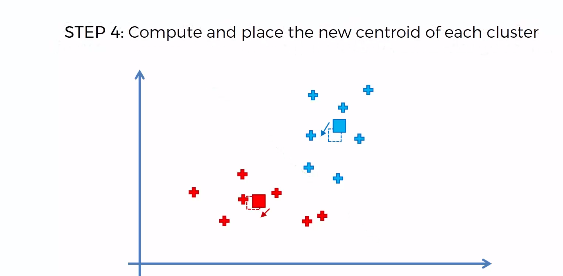

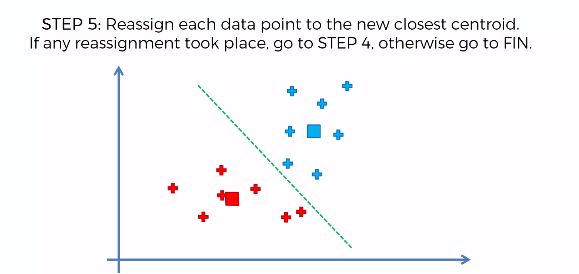

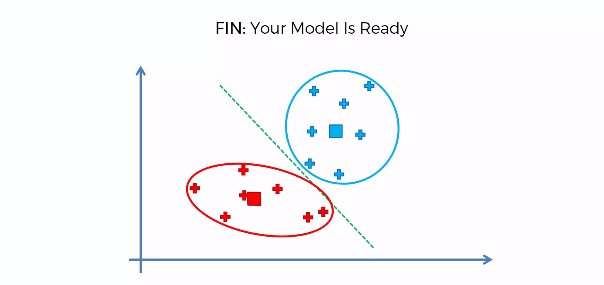

**Random Initilization Trap**

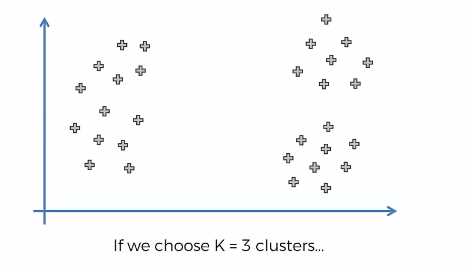

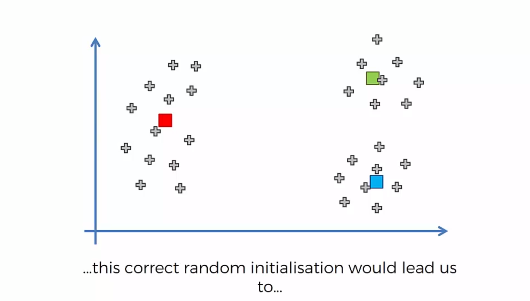

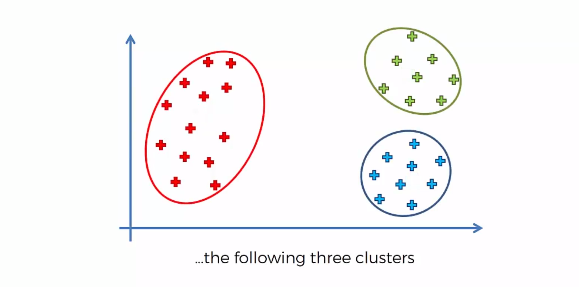

**What happens with a bad Random Inilization?**

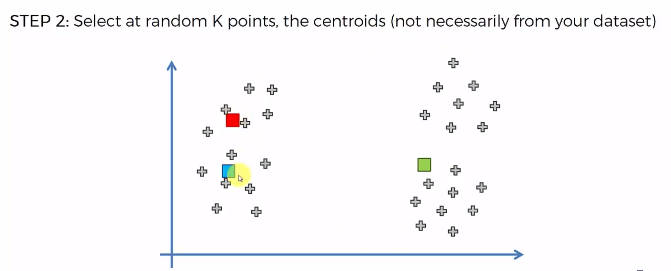

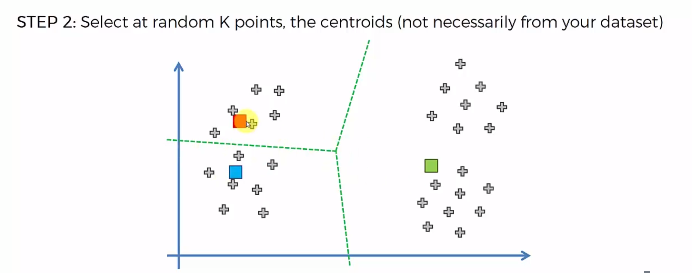

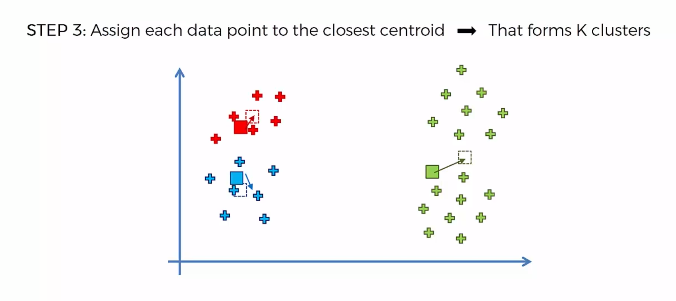

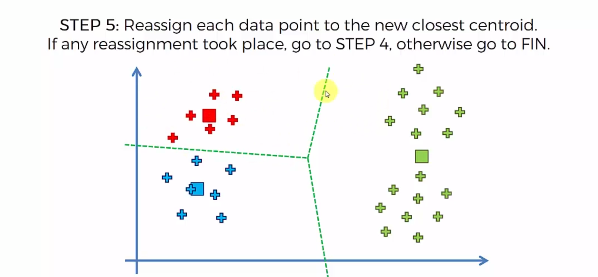

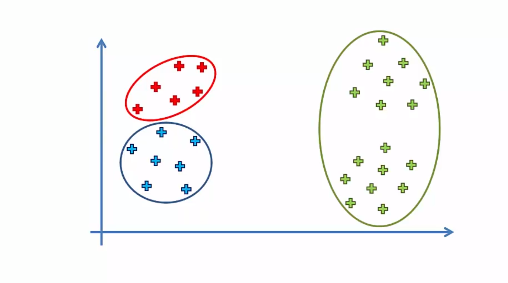

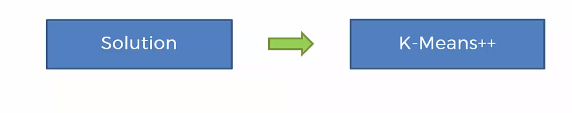

The exact algorithm is as follows:

1. Choose one center uniformly at random among the data points.
2. For each data point x not chosen yet, compute D(x), the distance between x and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
4. Repeat Steps 2 and 3 until k centers have been chosen.
Now that the initial centers have been chosen, proceed using standard** k-means clustering**.

By following the above procedure for initialization, we pick up centroids that are far away from one another. This increases the chances of initially picking up centroids that lie in different clusters. Also, since centroids are picked up from the data points, each centroid has some data points associated with it at the end.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

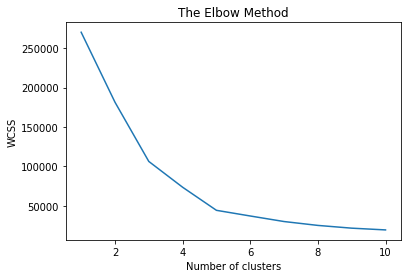

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

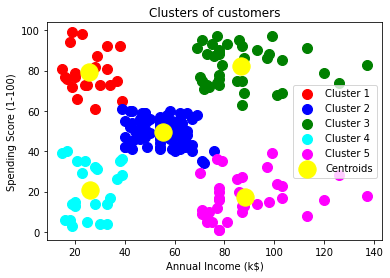

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

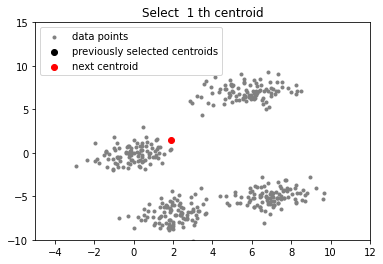

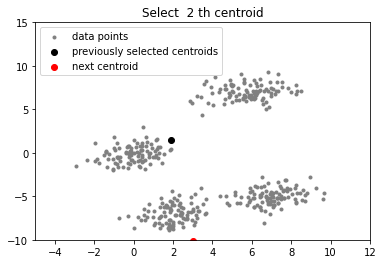

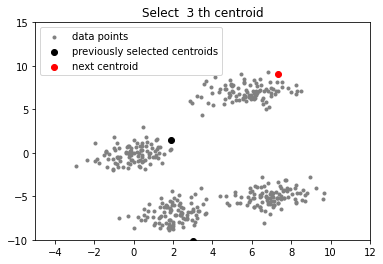

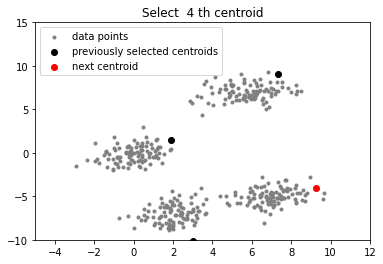

In [9]:
# importing dependencies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 

# creating data 
mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100) 

mean_02 = np.array([6.0, 7.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100) 

mean_03 = np.array([7.0, -5.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100) 

mean_04 = np.array([2.0, -7.0]) 
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100) 

data = np.vstack((dist_01, dist_02, dist_03, dist_04)) 
np.random.shuffle(data) 

# function to plot the selected centroids 
def plot(data, centroids): 
	plt.scatter(data[:, 0], data[:, 1], marker = '.', 
				color = 'gray', label = 'data points') 
	plt.scatter(centroids[:-1, 0], centroids[:-1, 1], 
				color = 'black', label = 'previously selected centroids') 
	plt.scatter(centroids[-1, 0], centroids[-1, 1], 
				color = 'red', label = 'next centroid') 
	plt.title('Select % d th centroid'%(centroids.shape[0])) 
	
	plt.legend() 
	plt.xlim(-5, 12) 
	plt.ylim(-10, 15) 
	plt.show() 
		
# function to compute euclidean distance 
def distance(p1, p2): 
	return np.sum((p1 - p2)**2) 

# initialization algorithm 
def initialize(data, k): 
	''' 
	initialized the centroids for K-means++ 
	inputs: 
		data - numpy array of data points having shape (200, 2) 
		k - number of clusters 
	'''
	## initialize the centroids list and add 
	## a randomly selected data point to the list 
	centroids = [] 
	centroids.append(data[np.random.randint( 
			data.shape[0]), :]) 
	plot(data, np.array(centroids)) 

	## compute remaining k - 1 centroids 
	for c_id in range(k - 1): 
		
		## initialize a list to store distances of data 
		## points from nearest centroid 
		dist = [] 
		for i in range(data.shape[0]): 
			point = data[i, :] 
			d = sys.maxsize 
			
			## compute distance of 'point' from each of the previously 
			## selected centroid and store the minimum distance 
			for j in range(len(centroids)): 
				temp_dist = distance(point, centroids[j]) 
				d = min(d, temp_dist) 
			dist.append(d) 
			
		## select data point with maximum distance as our next centroid 
		dist = np.array(dist) 
		next_centroid = data[np.argmax(dist), :] 
		centroids.append(next_centroid) 
		dist = [] 
		plot(data, np.array(centroids)) 
	return centroids 

# call the initialize function to get the centroids 
centroids = initialize(data, k = 4) 
